In [1]:
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.image as mpimg

import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.preprocessing.image import ImageDataGenerator

2021-10-11 14:00:28.499908: W tensorflow/stream_executor/platform/default/dso_loader.cc:60] Could not load dynamic library 'libcudart.so.11.0'; dlerror: libcudart.so.11.0: cannot open shared object file: No such file or directory; LD_LIBRARY_PATH: /opt/conda/lib
2021-10-11 14:00:28.500027: I tensorflow/stream_executor/cuda/cudart_stub.cc:29] Ignore above cudart dlerror if you do not have a GPU set up on your machine.


In [2]:
train_dir = os.path.join('../input/acne-grading-classificationdataset/Created Dataset')
labels = ['Level_0', 'Level_1', 'Level_2']

In [3]:
for label in labels:
    directory = os.path.join(train_dir, label)
    print("Images of label \"" + label + "\":\t", len(os.listdir(directory)))

Images of label "Level_0":	 387
Images of label "Level_1":	 473
Images of label "Level_2":	 139


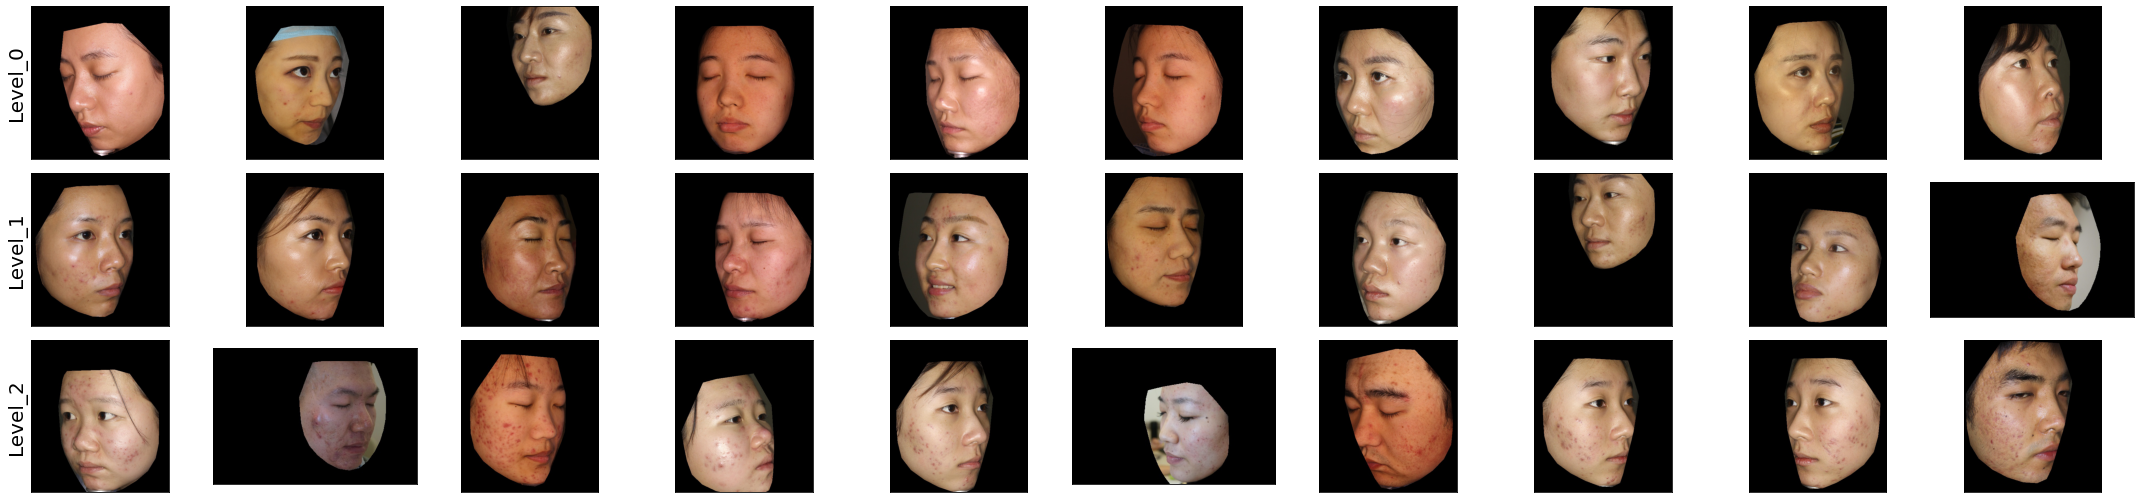

In [4]:
plt.figure(figsize=(30,14))

for i in range(3):
    directory = os.path.join(train_dir, labels[i])
    for j in range(10):
        path = os.path.join(directory, os.listdir(directory)[j])
        img = mpimg.imread(path)
        
        plt.subplot(6, 10, i*10 + j + 1)
        plt.imshow(img)
        
        if j == 0:
            plt.ylabel(labels[i], fontsize=20)
        
plt.setp(plt.gcf().get_axes(), xticks=[], yticks=[]);
plt.tight_layout()
plt.show()

In [5]:
directory = os.path.join(train_dir, 'Level_0')
path = os.path.join(directory, os.listdir(directory)[0])
image = mpimg.imread(path)
image.shape

(555, 500, 3)

In [6]:
model = tf.keras.Sequential([
  tf.keras.layers.Conv2D(32, (3, 3), activation='relu', input_shape=(384, 512, 3)),
  tf.keras.layers.MaxPooling2D(2, 2),
  tf.keras.layers.Dropout(0.2),
    
  tf.keras.layers.Conv2D(64, (3, 3), activation='relu'),
  tf.keras.layers.MaxPooling2D(2, 2),
  tf.keras.layers.Dropout(0.2),
    

 tf.keras.layers.Flatten(),
  tf.keras.layers.Dense(64, activation='relu'),
  tf.keras.layers.BatchNormalization(),
  tf.keras.layers.Dropout(0.4),
  tf.keras.layers.Dense(3, activation='softmax')  
])

model.summary()

2021-10-11 14:00:36.047821: I tensorflow/compiler/jit/xla_cpu_device.cc:41] Not creating XLA devices, tf_xla_enable_xla_devices not set
2021-10-11 14:00:36.050868: W tensorflow/stream_executor/platform/default/dso_loader.cc:60] Could not load dynamic library 'libcuda.so.1'; dlerror: libcuda.so.1: cannot open shared object file: No such file or directory; LD_LIBRARY_PATH: /opt/conda/lib
2021-10-11 14:00:36.050900: W tensorflow/stream_executor/cuda/cuda_driver.cc:326] failed call to cuInit: UNKNOWN ERROR (303)
2021-10-11 14:00:36.050925: I tensorflow/stream_executor/cuda/cuda_diagnostics.cc:156] kernel driver does not appear to be running on this host (c98bb1ad415c): /proc/driver/nvidia/version does not exist
2021-10-11 14:00:36.052075: I tensorflow/core/platform/cpu_feature_guard.cc:142] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 FMA
To enable them in other operation

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 382, 510, 32)      896       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 191, 255, 32)      0         
_________________________________________________________________
dropout (Dropout)            (None, 191, 255, 32)      0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 189, 253, 64)      18496     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 94, 126, 64)       0         
_________________________________________________________________
dropout_1 (Dropout)          (None, 94, 126, 64)       0         
_________________________________________________________________
flatten (Flatten)            (None, 758016)            0

In [7]:
model.compile(loss='sparse_categorical_crossentropy', optimizer=keras.optimizers.Adam(lr = 0.0001), metrics=['accuracy'])

In [8]:
train_datagen = ImageDataGenerator(horizontal_flip=True,vertical_flip=True,
                                   rotation_range=15,zoom_range=0.1,
                                   width_shift_range=0.15,height_shift_range=0.15,
                                   shear_range=0.1,
                                   fill_mode="nearest",
                                   rescale=1./255., 
                                   validation_split=0.2)

train_generator = train_datagen.flow_from_directory(train_dir, target_size=(384, 512), batch_size=32, class_mode='binary', subset='training')
validation_generator = train_datagen.flow_from_directory(train_dir, target_size=(384, 512), batch_size=32, class_mode='binary', subset='validation')

Found 801 images belonging to 3 classes.
Found 198 images belonging to 3 classes.


In [9]:
class myCallback(tf.keras.callbacks.Callback):
    def on_epoch_end(self, epoch, logs={}):
        if(logs.get('accuracy')>0.98):
            print("\nReached 90% accuracy so cancelling training!")
            self.model.stop_training = True

callbacks = myCallback()

In [10]:
history = model.fit(train_generator, epochs=20, verbose=1, validation_data=validation_generator, callbacks=[callbacks])

2021-10-11 14:00:39.038402: I tensorflow/compiler/mlir/mlir_graph_optimization_pass.cc:116] None of the MLIR optimization passes are enabled (registered 2)
2021-10-11 14:00:39.042959: I tensorflow/core/platform/profile_utils/cpu_utils.cc:112] CPU Frequency: 2199995000 Hz


Epoch 1/20
26/26 [==============================] - 180s 7s/step - loss: 1.6172 - accuracy: 0.3284 - val_loss: 1.2622 - val_accuracy: 0.3687
Epoch 2/20
26/26 [==============================] - 191s 7s/step - loss: 1.3711 - accuracy: 0.3306 - val_loss: 1.1936 - val_accuracy: 0.3788
Epoch 3/20
26/26 [==============================] - 177s 7s/step - loss: 1.2785 - accuracy: 0.3331 - val_loss: 1.1124 - val_accuracy: 0.3485
Epoch 4/20
26/26 [==============================] - 179s 7s/step - loss: 1.3424 - accuracy: 0.3553 - val_loss: 1.1368 - val_accuracy: 0.3687
Epoch 5/20
26/26 [==============================] - 194s 7s/step - loss: 1.2558 - accuracy: 0.3585 - val_loss: 1.0945 - val_accuracy: 0.3535
Epoch 6/20
26/26 [==============================] - 178s 7s/step - loss: 1.3140 - accuracy: 0.3328 - val_loss: 1.0968 - val_accuracy: 0.3485
Epoch 7/20
26/26 [==============================] - 178s 7s/step - loss: 1.2080 - accuracy: 0.3991 - val_loss: 1.0946 - val_accuracy: 0.3788
Epoch 8/20
26

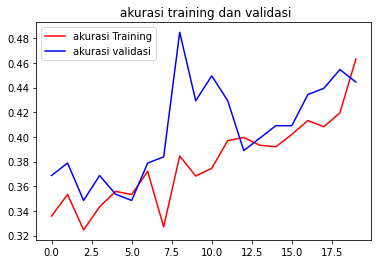

<Figure size 432x288 with 0 Axes>

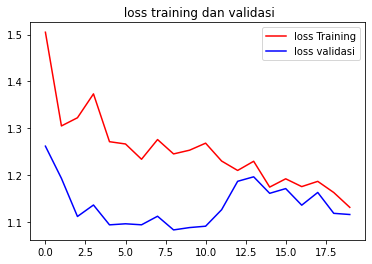

<Figure size 432x288 with 0 Axes>

In [11]:
import matplotlib.pyplot as plt
acc = history.history['accuracy']
val_acc=history.history['val_accuracy']
loss = history.history['loss' ]
val_loss = history.history['val_loss']

epochs = range (len(acc))

plt.plot(epochs, acc,'r', label ='akurasi Training')
plt.plot (epochs, val_acc, 'b',label='akurasi validasi')
plt.title(' akurasi training dan validasi')
plt.legend (loc=0)
plt.figure()
plt.show()
          
plt.plot(epochs, loss, 'r', label = 'loss Training')
plt.plot (epochs, val_loss, 'b',label='loss validasi')
plt.title(' loss training dan validasi')
plt.legend (loc=0)
plt.figure()
plt.show()

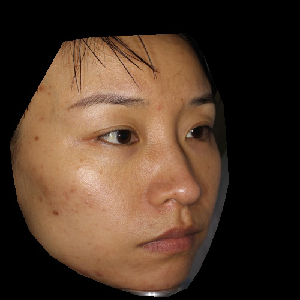

In [12]:
from tensorflow.keras.preprocessing import image
image.load_img('../input/acne-grading-classificationdataset/Created Dataset/Level_0/levle0_1.jpg', target_size= (300,300))

In [13]:
Name=[]
BASIS_DIR = ('../input/acne-grading-classificationdataset/Created Dataset')
for file in os.listdir(BASIS_DIR) : Name+=[file]

print(Name)
print(len(Name))

['Level_0', 'Level_1', 'Level_2']
3


In [14]:
N= []
for i in range(len(Name)):
    N+=[i]
    
normal_mapping=dict(zip(Name,N))
reverse_mapping=dict(zip(N,Name))

def mapper(value):
 return reverse_mapping[value]



In [15]:
from tensorflow.keras.preprocessing. image import load_img, img_to_array
image=load_img("../input/acne-grading-classificationdataset/Created Dataset/Level_0/levle0_1.jpg" , target_size=(384, 512) )
image=img_to_array(image)
image=image/255.0
prediction_image=np.array(image)
prediction_image=np.expand_dims (image, axis=0)

In [16]:
prediction= model.predict(prediction_image)
value=np.argmax(prediction)
move_name=mapper(value)
print ("Prediction is{}.".format(move_name))

Prediction isLevel_1.
